### Midterm
Ui-Wing Cheah

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as sp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


##### Problem 4 Calculations

In [55]:
Pmat = np.array([1/2,1/2,0,0,1/24,7/8,1/12,0,1/36,0,8/9,1/12,1/8,0,0,7/8]).reshape(4,4)

In [56]:
# take 100-th power of Pmat. The matrix should converge to the limiting distribution
np.linalg.matrix_power(Pmat,100)

array([[0.1       , 0.39999995, 0.30000001, 0.20000003],
       [0.1       , 0.39999997, 0.3       , 0.20000003],
       [0.1       , 0.40000005, 0.29999996, 0.19999999],
       [0.09999999, 0.40000001, 0.30000005, 0.19999995]])

#### Problem 5 Calculations

In [58]:
# 5(a)

In [59]:
Pmat = np.array([0.7,0.3,0.2, 0.8]).reshape(2,2)

In [60]:
np.linalg.matrix_power(Pmat,100)

array([[0.4, 0.6],
       [0.4, 0.6]])

In [61]:
# 5(b)

In [62]:
Pmat = np.array([0.7,0.3,0.,0.2, 0.8,0.,0.05,0.05,0.9]).reshape(3,3)

In [63]:
np.linalg.matrix_power(Pmat,100)

array([[4.00000000e-01, 6.00000000e-01, 0.00000000e+00],
       [4.00000000e-01, 6.00000000e-01, 0.00000000e+00],
       [3.99990039e-01, 5.99983399e-01, 2.65613989e-05]])

##### Problem 8

Text(0.5, 0, 'x')

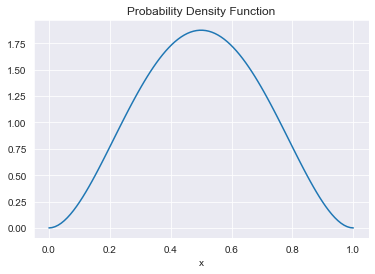

In [54]:
#plot the distribution to get a sense of it
xvals = np.linspace(0,1,100)
ax_ =sns.lineplot(x=xvals,y=yvar)
ax_.set_title('Probability Density Function')
ax_.set_xlabel('x')
ax_.set


In [7]:
def accept_reject(f_pdf, g_pdf, g_gen,M=1,ndraws=100,*args,**kwargs):
    # accept reject method
    # f_pdf is desired pdf to sample from.
    # g_pdf is the candidate pdf function
    # g_gen is the function to generate a candidate value
    # M is the scalar such that Mg(x) is always greater than or equal to f(x)
    # for the midterm g_pdf will be uniform so this is a little overkill but 
    # better to do things compartmentalized from my experience for debugging
    
    sim_values = np.zeros(ndraws,)
    sim_success = 0 
    sim_idx = -1 #python convention
    n_count=0    
    while sim_success < ndraws:
        # get candidate value
        cand_rv = g_gen(*args,**kwargs)
        # draw uniform random value bounded between 0 and M*cand_rand
        unif_rv = sp.uniform.rvs(loc=0,scale=M*g_pdf(cand_rv),size=1,)        
        # if the scaled uniform value is less than f(u) we accept it
        if unif_rv < f_pdf(cand_rv,):
            sim_idx +=1
            sim_values[sim_idx]=cand_rv
            # update the success counter
            sim_success +=1
    return sim_values


In [9]:
# creating the pdf for desired distribution
def f_dist(x,*args,**kwargs):
    return 30*(pow(x,2)-2*pow(x,3)+pow(x,4))
# candidate distribution and generator function
# we will use uniform distributions for the midterm problem
def g_dist(x,*args,**kwargs):
    # get pdf value
    return sp.uniform.pdf(x,)
def g_get(n=1,*args,**kwargs):
    # generate random sample
    return sp.uniform.rvs(size=n)


In [10]:
# run my coded accep-reject algorithm to get the samples
# set M = 2 since we're using a uniform distribution as the candidate
samples = accept_reject(f_dist,g_dist,g_get,M=2,ndraws=10000)

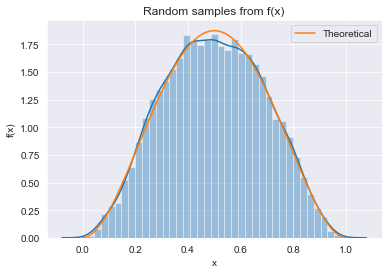

In [66]:
# use seaborn distplot - this is pretty neat
sns.set_style('darkgrid')
ax_ =sns.distplot(samples,kde=True)
ax_.plot(xvals,yvar,label='Theoretical')
ax_.set_title('Random samples from f(x)')
ax_.set_xlabel('x')
ax_.set_ylabel('f(x)')
ax_.legend()